# 14장 군집분석

## 14.2 계층적 군집분석
### 분석 시나리오

A쇼핑은 RFM 기반의 고객세분화를 수행하고자 500명의 고객을 무작위로 샘플링 하여 Recency, Frequency, Monetary 세 가지 변수를 통한 계층적 군집분석을 진행하고자 한다.

In [1]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from scipy.cluster.hierarchy import linkage
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
data_temp = df.sample(n=500, random_state=111) 
X = data_temp[['Recency','Frequency','Monetary']]

#2. 계층적 군집분석
cluster= linkage(X, method = 'average', metric='euclidean') 
print(cluster[490:])

[[969.         979.           2.43557142  72.        ]
 [978.         988.           2.60070576  33.        ]
 [984.         991.           2.78913055  40.        ]
 [981.         989.           3.05800305 374.        ]
 [986.         990.           3.11871825  81.        ]
 [161.         993.           3.55293738 375.        ]
 [994.         995.           3.67802103 456.        ]
 [987.         992.           3.97824721  44.        ]
 [996.         997.           6.01862823 500.        ]]


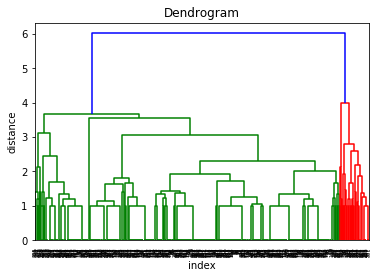

In [2]:
#1. 모듈 불러오기
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
#2 덴드로그램 그리기
%matplotlib inline
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster)
plt.show()

## 14.3 비계층적 군집분석
### 분석 시나리오

앞서 계층적 군집분석의 실습에서 진행해본 RFM 기반의 고객세분화를 K 평균 군집분석으로도 수행해보자.

In [4]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from sklearn.cluster import KMeans
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
X = df[['Recency','Frequency','Monetary']] 

#2. 비계층적 군집분석
model = KMeans(n_clusters=3, max_iter=20, random_state=19).fit(X) 
X['cluster_id'] = model.labels_ 

#3. 군집별 고객 수 확인
clu1 = X[X.cluster_id==0]
clu2 = X[X.cluster_id==1]
clu3 = X[X.cluster_id==2]
print('군집1의 고객 수\n',clu1.cluster_id.count())
print('군집2의 고객 수\n',clu2.cluster_id.count())
print('군집3의 고객 수\n',clu3.cluster_id.count())

#4. 군집별 평균 RFM 확인
print('군집1의 RFM평균\n',clu1.Recency.mean(),clu1.Frequency.mean(),clu1.Monetary.mean())
print('군집2의 RFM평균\n',clu2.Recency.mean(),clu2.Frequency.mean(),clu2.Monetary.mean())
print('군집3의 RFM평균\n',clu3.Recency.mean(),clu3.Frequency.mean(),clu3.Monetary.mean())

군집1의 고객 수
 512
군집2의 고객 수
 77
군집3의 고객 수
 411
군집1의 RFM평균
 6.8359375 3.212890625 2.892578125
군집2의 RFM평균
 1.7792207792207793 3.207792207792208 3.7532467532467533
군집3의 RFM평균
 6.9391727493917275 4.600973236009732 5.768856447688565


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
